In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
path='F:/Munesh Backup/Munesh/Imarticus/Projects/Ensemble Learning/bank-additional-full.csv'
bank_data=pd.read_csv(path,delimiter=';')
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
bank_data.shape

(41188, 21)

In [5]:
# checking for null values and shape
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# separating the target variable
target=bank_data.pop('y')
target

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [7]:
# splitting data into categorical and numerical values
data_num=bank_data.select_dtypes(exclude='object')
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


In [8]:
data_cat=bank_data.select_dtypes(include='object')
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB


In [9]:
# checking for correlation
cor=data_num.corr()
cor

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


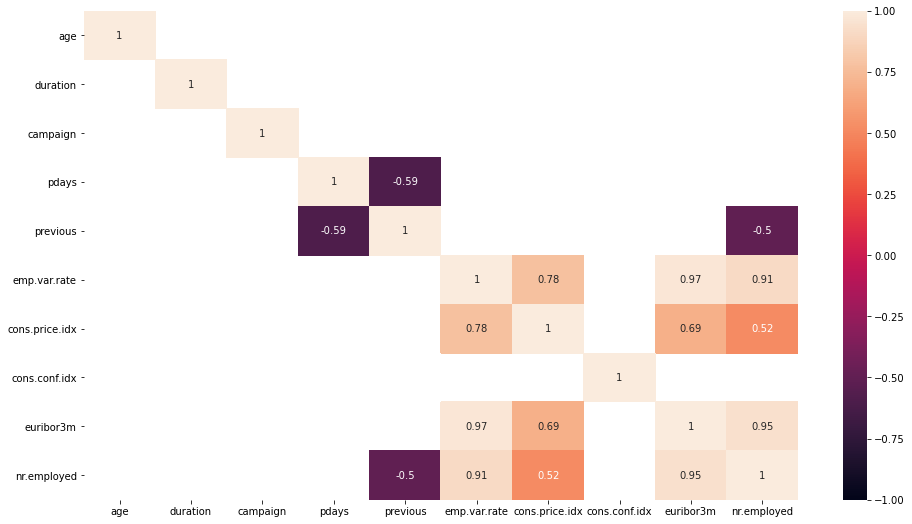

In [10]:
# plotting heat map
plt.figure(figsize=(16,9))
sns.heatmap(cor[(cor>=0.5) | (cor<=-0.5)],vmin=-1,vmax=1,annot=True,square=False)

We can see that emp.var.rate has high correlation with 3 other variables. Therefore in subsequent models we can remove feature emp.var.rate

In [11]:
# getting dummy variables for categorical variables
dummy_cat=pd.get_dummies(data_cat,drop_first=True)
dummy_cat.shape

(41188, 43)

In [12]:
dummy_cat.describe()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,0.024619,...,0.334296,0.099568,0.017432,0.013839,0.206711,0.209357,0.196416,0.197485,0.863431,0.033335
std,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,0.154962,...,0.471750,0.299427,0.130877,0.116824,0.404951,0.406855,0.397292,0.398106,0.343396,0.179512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Normalizing the Numerical data
data_num_tr=data_num.copy()
sc=StandardScaler()
data_num_tr.iloc[:,0:len(data_num.columns)]=sc.fit_transform(data_num)
data_num_tr.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,2.846557e-16,-3.170967e-16,1.845337e-14,9.515119e-14,2.196991e-13,-1.851020e-13,-5.933520e-14,-6.842191e-14,-6.864230e-14,-1.181213e-13
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.209365e+00,-9.961775e-01,-5.659220e-01,-5.149443e+00,-3.494943e-01,-2.216433e+00,-2.374889e+00,-2.224953e+00,-1.722351e+00,-2.815697e+00
25%,-7.699804e-01,-6.027745e-01,-5.659220e-01,1.954139e-01,-3.494943e-01,-1.197935e+00,-8.649547e-01,-4.747909e-01,-1.312994e+00,-9.402810e-01
50%,-1.942267e-01,-3.019369e-01,-2.049085e-01,1.954139e-01,-3.494943e-01,6.480923e-01,2.994571e-01,-2.803284e-01,7.124599e-01,3.316799e-01
75%,6.694038e-01,2.341712e-01,1.561049e-01,1.954139e-01,-3.494943e-01,8.390606e-01,7.227225e-01,8.864466e-01,7.724221e-01,8.451701e-01
max,5.563310e+00,1.797202e+01,1.928982e+01,1.954139e-01,1.379492e+01,8.390606e-01,2.058168e+00,2.939106e+00,8.208531e-01,8.451701e-01


In [14]:
# append the data 
bank_data_tr=pd.concat([data_num_tr,dummy_cat],axis=1)
bank_data_tr.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0


In [15]:
# getting dummy for target column
target=pd.get_dummies(target,drop_first=True)
target.head()

,yes
0,0
1,0
2,0
3,0
4,0


In [16]:
# splitting the data
trainx,testx,trainy,testy=train_test_split(bank_data_tr,target,test_size=0.3)
trainx.shape,testx.shape,trainy.shape,testy.shape

((28831, 53), (12357, 53), (28831, 1), (12357, 1))

In [17]:
# Building a function that will run all models
def run_model(trainx,trainy):
    
 
    #decision Tree Model
    model_dt=DecisionTreeClassifier(criterion='gini').fit(trainx,trainy)
    
    #Random forest Model
    model_rf=RandomForestClassifier(n_estimators=100).fit(trainx,trainy)
    
    #Adaboost Model
    dt=DecisionTreeClassifier(max_depth=1)   #using 1 features i.e 1 stump for Adaboost
    model_ada=AdaBoostClassifier(dt,n_estimators=50).fit(trainx,trainy)
    
    #XGBoost Model 
    model_xgb=XGBClassifier(n_estimators=100).fit(trainx,trainy)
    
    return [model_dt,model_rf,model_ada,model_xgb]

In [18]:
# building funtion to plot ROC AUC curve and get metrics
def get_results(model,testx,testy):
    # unpacking the models
    model_dt,model_rf,model_ada,model_xgb=model
    
    # predicting the values
    p_dt=model_dt.predict(testx)
    p_rf=model_rf.predict(testx)
    p_ada=model_ada.predict(testx)
    p_xgb=model_xgb.predict(testx)
    
    # creating lists to store result
    model=['Decision Tree','Random Forest','Adaboost','XGBoost']
    
    accuracy=np.round(np.array([accuracy_score(testy,p_dt),accuracy_score(testy,p_rf),
              accuracy_score(testy,p_ada),accuracy_score(testy,p_xgb)]),2)
    
    f1score=np.round(np.array([f1_score(testy,p_dt),f1_score(testy,p_rf),
              f1_score(testy,p_ada),f1_score(testy,p_xgb)]),2)
    
    # unpacking fpr,tpr
    fpr_dt,tpr_dt,thres_dt=roc_curve(testy,p_dt)
    fpr_rf,tpr_rf,thres_rd=roc_curve(testy,p_rf)
    fpr_ada,tpr_ada,thres_ada=roc_curve(testy,p_ada)
    fpr_xgb,tpr_xgb,thres_xgb=roc_curve(testy,p_xgb)
    
    #getting auc
    auc_dt=np.round(auc(fpr_dt,tpr_dt),2)
    auc_rf=np.round(auc(fpr_rf,tpr_rf),2)
    auc_ada=np.round(auc(fpr_ada,tpr_ada),2)
    auc_xgb=np.round(auc(fpr_xgb,tpr_xgb),2)
    roc_auc=[auc_dt,auc_rf,auc_ada,auc_xgb]

    # getting the tpr for roc_curve which is sensitivity
    sensitivity=np.round(np.array([tpr_dt[1],tpr_rf[1],tpr_ada[1],tpr_xgb[1]]),2)
    # getting the fpr and subtracting from 1 to get specificity
    specificity=np.round(np.array([1-fpr_dt[1],1-fpr_rf[1],1-fpr_ada[1],1-fpr_xgb[1]]),2)
    
    
    results=pd.DataFrame({'model':model,'accuracy':accuracy,'f1_score':f1score,
                       'sensitivity':sensitivity,'specificity':specificity,'ROC':roc_auc})
    
    # plotting ROC AUC
    plt.figure(figsize=(15,7))
    plt.plot(fpr_dt,tpr_dt,label='Decision Tree AUC: %0.2f'%auc_dt)
    plt.plot(fpr_rf,tpr_rf,label='Random Forest AUC: %0.2f'%auc_rf)
    plt.plot(fpr_ada,tpr_ada,label='AdaBoost AUC: %0.2f'%auc_ada)
    plt.plot(fpr_xgb,tpr_xgb,label='XGBoost AUC: %0.2f'%auc_xgb)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC curve')
    plt.legend()
    plt.show()
    
    
    return results

In [19]:
# creating model
model=run_model(trainx,trainy)

[19:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


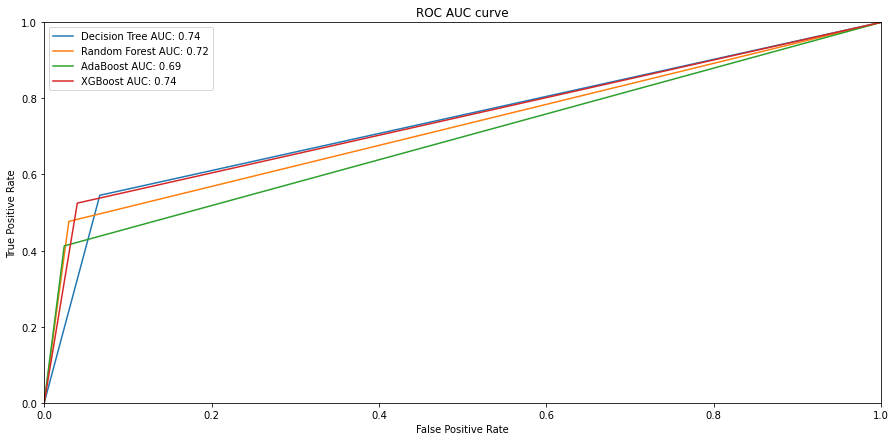

,model,accuracy,f1_score,sensitivity,specificity,ROC
0,Decision Tree,0.89,0.53,0.55,0.93,0.74
1,Random Forest,0.91,0.56,0.48,0.97,0.72
2,Adaboost,0.91,0.52,0.41,0.98,0.69
3,XGBoost,0.91,0.57,0.52,0.96,0.74


In [20]:
# plotting ROC AUC curve and getting results
result_1=get_results(model,testx,testy)
result_1

In [21]:
trainx.pop('emp.var.rate')
testx.pop('emp.var.rate')

6666     0.648092
3193     0.648092
25002   -0.115781
21343    0.839061
19431    0.839061
           ...   
39776   -1.197935
4458     0.648092
2904     0.648092
8725     0.839061
22163    0.839061
Name: emp.var.rate, Length: 12357, dtype: float64

[19:31:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


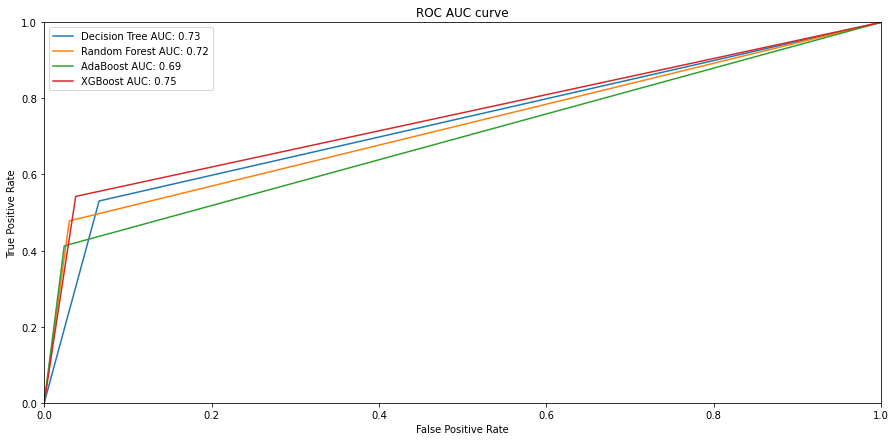

,model,accuracy,f1_score,sensitivity,specificity,ROC
0,Decision Tree,0.89,0.52,0.53,0.93,0.73
1,Random Forest,0.91,0.56,0.48,0.97,0.72
2,Adaboost,0.91,0.52,0.41,0.98,0.69
3,XGBoost,0.91,0.59,0.54,0.96,0.75


In [22]:
# Building model after removing variable
model=run_model(trainx,trainy)
# Plotting graphs & getting results
result_2=get_results(model,testx,testy)
result_2

In [23]:
trainx.pop('euribor3m')
testx.pop('euribor3m')

6666     0.712460
3193     0.714190
25002    0.306562
21343    0.773575
19431    0.775881
           ...   
39776   -1.683721
4458     0.711883
2904     0.713613
8725     0.716496
22163    0.773575
Name: euribor3m, Length: 12357, dtype: float64

[19:31:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


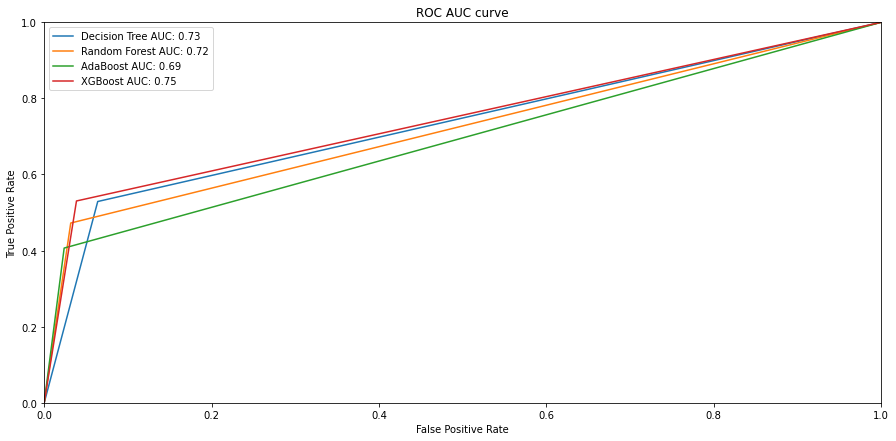

,model,accuracy,f1_score,sensitivity,specificity,ROC
0,Decision Tree,0.89,0.52,0.53,0.94,0.73
1,Random Forest,0.91,0.55,0.47,0.97,0.72
2,Adaboost,0.91,0.51,0.41,0.98,0.69
3,XGBoost,0.91,0.58,0.53,0.96,0.75


In [24]:
# Building model after removing variable
model=run_model(trainx,trainy)
# Plotting graphs & getting results
result_3=get_results(model,testx,testy)
result_3

In [25]:
# removing duration as mentioned in Problem Statement
trainx.pop('duration')
testx.pop('duration')

6666    -0.537207
3193     1.314101
25002   -0.699197
21343    2.008342
19431   -0.055096
           ...   
39776    0.515724
4458     0.461728
2904    -0.579633
8725    -0.220942
22163   -0.533350
Name: duration, Length: 12357, dtype: float64

[19:32:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


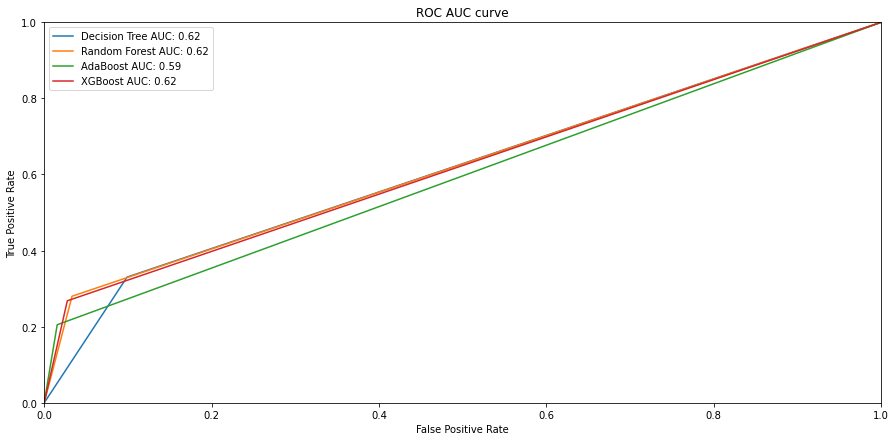

,model,accuracy,f1_score,sensitivity,specificity,ROC
0,Decision Tree,0.84,0.32,0.33,0.90,0.62
1,Random Forest,0.89,0.36,0.28,0.97,0.62
2,Adaboost,0.90,0.31,0.21,0.98,0.59
3,XGBoost,0.89,0.36,0.27,0.97,0.62


In [26]:
# Building model after removing variable
model=run_model(trainx,trainy)
# Plotting graphs & getting results
result_4=get_results(model,testx,testy)
result_4

<BarContainer object of 53 artists>

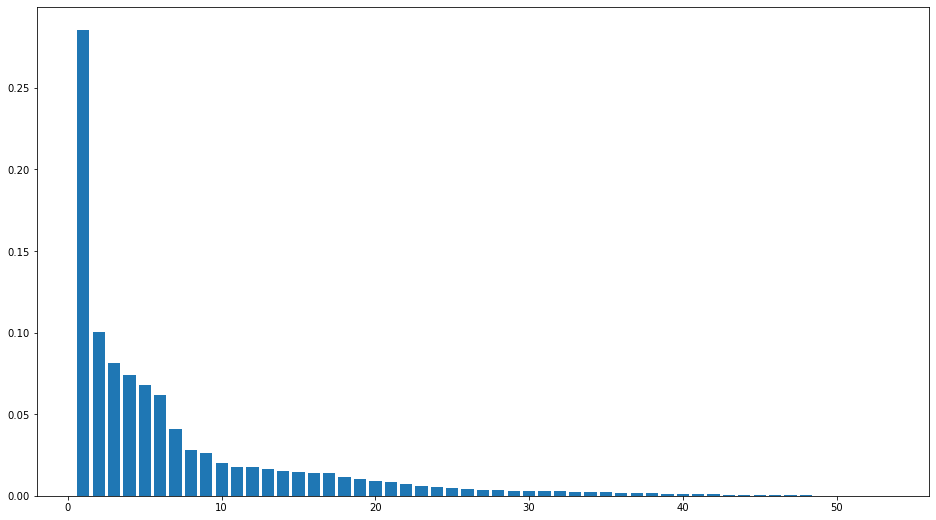

In [27]:
# Next using PCA to reduce components
# splitting the data
trainx,testx,trainy,testy=train_test_split(bank_data_tr,target,test_size=0.3)
pca=PCA(n_components=None)
trainx_pca=pca.fit_transform(trainx)
testx_pca=pca.fit_transform(testx)
exp_var=pca.explained_variance_ratio_
plt.figure(figsize=(16,9))
plt.bar(range(1,len(exp_var)+1),exp_var)

In [28]:
np.sum(exp_var[0:6])

0.6709760692590268

In [29]:
pca=PCA(n_components=7)
trainx_pca=pca.fit_transform(trainx)
testx_pca=pca.fit_transform(testx)
#exp_var=pca.explained_variance_ratio_
#plt.figure(figsize=(16,9))
#plt.bar(range(1,len(exp_var)+1),exp_var)

[19:33:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


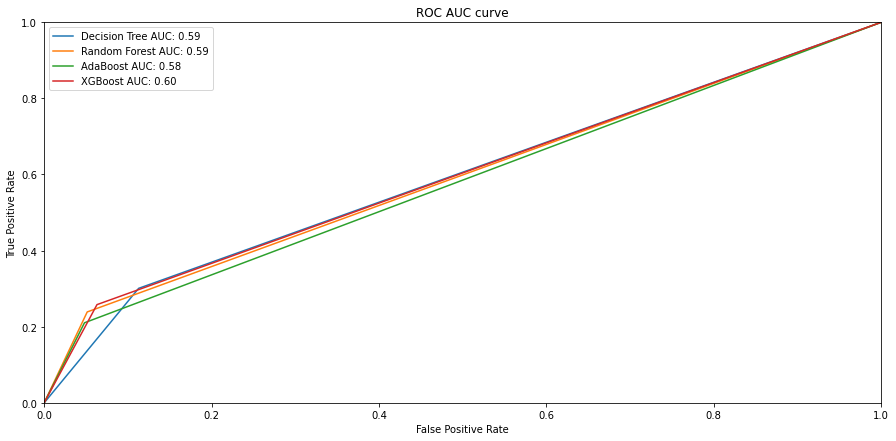

,model,accuracy,f1_score,sensitivity,specificity,ROC
0,Decision Tree,0.82,0.28,0.30,0.89,0.59
1,Random Forest,0.87,0.29,0.24,0.95,0.59
2,Adaboost,0.87,0.27,0.21,0.95,0.58
3,XGBoost,0.86,0.29,0.26,0.94,0.60


In [30]:
# GENERATING Model
model=run_model(trainx_pca,trainy)
# plotting ROC and generating results
result_5=get_results(model,testx_pca,testy)
result_5

In [31]:
# Comparing results
print('Model with all features\n',result_1)
print('\nModel with emp.var.rate feature removed\n',result_2)
print('\nModel with euribor3m feature removed\n',result_3)
print('\nModel with duration feature removed\n',result_4)
print('\nModel with 7 Principal Components\n',result_5)

Model with all features
            model  accuracy  f1_score  sensitivity  specificity   ROC
0  Decision Tree      0.89      0.53         0.55         0.93  0.74
1  Random Forest      0.91      0.56         0.48         0.97  0.72
2       Adaboost      0.91      0.52         0.41         0.98  0.69
3        XGBoost      0.91      0.57         0.52         0.96  0.74

Model with emp.var.rate feature removed
            model  accuracy  f1_score  sensitivity  specificity   ROC
0  Decision Tree      0.89      0.52         0.53         0.93  0.73
1  Random Forest      0.91      0.56         0.48         0.97  0.72
2       Adaboost      0.91      0.52         0.41         0.98  0.69
3        XGBoost      0.91      0.59         0.54         0.96  0.75

Model with euribor3m feature removed
            model  accuracy  f1_score  sensitivity  specificity   ROC
0  Decision Tree      0.89      0.52         0.53         0.94  0.73
1  Random Forest      0.91      0.55         0.47         0.97  0.